In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/global_features'
! mkdir $folder

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-23 11:00:59	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-23 11:00:59	Parsing datapackage to create a Study object
2016-02-23 11:01:35	Initializing Study
2016-02-23 11:01:35	Initializing Predictor configuration manager for Study
2016-02-23 11:01:35	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-23 11:01:35	Added ExtraTreesClassifier to default predictors
2016-02-23 11:01:35	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-23 11:01:35	Added ExtraTreesRegressor to default predictors
2016-02-23 11:01:35	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-23 11:01:35	Added GradientBoostingClassifier to default predictors
2016-02-23 11:01:35	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [3]:
modalities_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,ambivalent,1
1,MN,bimodal,356
2,MN,excluded,541
3,MN,included,1553
4,NPC,ambivalent,3


In [4]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [5]:
modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,1558,1049,541
bimodal,1348,751,356
included,4632,3029,1553
concurrent,1,NaN,NaN
ambivalent,31,3,1


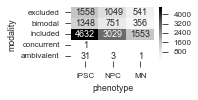

In [34]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), cmap='Greys')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

In [7]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,ambivalent,1,0.040800
1,MN,bimodal,356,14.524684
2,MN,excluded,541,22.072623
3,MN,included,1553,63.361893
4,NPC,ambivalent,3,0.062086
5,NPC,bimodal,751,15.542219
6,NPC,excluded,1049,21.709437
7,NPC,included,3029,62.686258
8,iPSC,ambivalent,31,0.409511
9,iPSC,bimodal,1348,17.807133


In [8]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2848: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


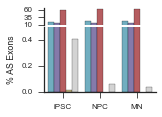

In [9]:

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 1.5), 
                         gridspec_kw=dict(hspace=0.05, height_ratios=[0.2, 0.8]))

ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax, bottom=True)
ax.tick_params(axis='x', bottom='off')
ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

ax = axes[1]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
           hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
       xlabel='')
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

## Venn diagrams

In [10]:
import matplotlib_venn

In [11]:
sns.set(context='paper', style='ticks')

In [12]:
from anchor import MODALITY_ORDER

In [13]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality  
MN         ambivalent       1
           bimodal        356
           excluded       541
           included      1553
NPC        ambivalent       3
           bimodal        751
           excluded      1049
           included      3029
iPSC       ambivalent      31
           bimodal       1348
           concurrent       1
           excluded      1558
           included      4632
dtype: int64

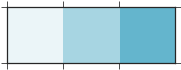

In [18]:
sns.palplot(sns.light_palette(MODALITY_PALETTE[0], n_colors=3))

In [24]:
from anchor import MODALITY_TO_CMAP

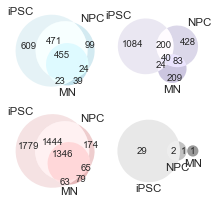

In [33]:
fig, axes = plt.subplots(figsize=(3, 3), nrows=2, ncols=2)

axes_iter = axes.flat

grouped_modality = study.supplemental.modalities_tidy.groupby('modality')

for modality in MODALITY_ORDER:
    modality_df = grouped_modality.get_group(modality)
    if modality == 'concurrent':
        continue
    grouped_phenotype = modality_df.groupby('phenotype')
    sets = [set(grouped_phenotype.get_group(phenotype)['event_id']) for phenotype in study.phenotype_order]
    
    ax = axes_iter.next()
    cmap = MODALITY_TO_CMAP[modality]

    set_colors = cmap(np.linspace(0, 1, 4))[1:]

#     set_colors = sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)
#     set_colors = study.phenotype_color_ordered
    matplotlib_venn.venn3(sets, set_labels=study.phenotype_order, set_colors=set_colors, ax=ax)
#     ax.set(title=modality)
fig.tight_layout()
fig.savefig('{}/venn_diagrams.pdf'.format(folder))

In [15]:
grouped.groups.keys()

NameError: name 'grouped' is not defined